In [2]:
import numpy as np
import pandas as pd
import csv
import copy
import os
import matplotlib.pyplot as plt

In [3]:
def open_file(p_1, p_2, p_3):
    init_data = []
    total = {}
    path = [p_1, p_2, p_3]
    # print(path)
    for p in path:
        with open(p) as csvDataFile:
            
            csvReader = csv.reader(csvDataFile)
            target = ['0', '0', '0', '0', '0', '0']
            for row in csvReader:
                if (target[1] + target[2]) != (row[1] + row[2]):
                    r_int = int(row[1] + row[2])
                    t_int = int(target[1] + target[2])
                    if (r_int - t_int) != 1:
                        target = row
                        init_data.append(row)
            total[p] = init_data
            init_data = []
    return total

In [4]:
def deal_with(data_in):
    collect = {}
    for x in data_in:
        h = int(x[1]) + 8
        if h >= 24:
            h = h - 24
        time = str(h) + ":" + str(x[2]) + ":" + str(x[3])
        # print(time)
        collect[time] = int(x[0])
    return collect

In [5]:
def create_time_list():
    time = []
    h = []
    for x in range(0, 24):
        h.append(x)
    m = []
    for x in range(0, 60, 5):
        m.append(x)
    # print(h)
    # print(m)
    a = []
    for x in h:
        for y in m:
            a.append(x)
            a.append(y)
            time.append(a)
            a = []
    # print(time)
    return time

In [6]:
def find_end(time_end):
    time = {}
    num = 1
    for x in time_end:
        x = x.split(":")
        hour = int(x[0])
        minute = int(x[1])
        time[num] = [hour, minute]
        num  = num + 1
    h_s = 24
    m_s = 60
    for x in time.items():
        if h_s > x[1][0]:
            h_s = x[1][0]
            m_s = x[1][1]
        elif h_s == x[1][0]:
            if m_s > x[1][1]:
                h_s = x[1][0]
                m_s = x[1][1]
    # print(h_s, m_s)
    return str(h_s) + ":" + str(m_s)

In [7]:
def unite(dict_in):
    correct_dict = {}
    temp = copy.copy(time)
    for x in temp[:]:
        standard_hour = x[0]
        standard_minute = x[1]
        time_key = str(standard_hour) + ":" + str(standard_minute)
        for key in dict_in.copy().keys():
            key2 = key.split(":")
            if int(key2[0]) == standard_hour:
                if int(key2[1]) <= standard_minute:
                    # print("in", time_key, dict_in[key])
                    correct_dict[time_key] = dict_in[key]
                    del dict_in[key]
            elif int(key2[0]) < standard_hour:
                # print("in", time_key, dict_in[key])
                correct_dict[time_key] = dict_in[key]
                del dict_in[key]
    # print(correct_dict)
    return correct_dict

In [8]:
def low_high_bound(i_38, i_47, i_G5):
    first = [i_38[0], i_47[0], i_G5[0]]
    last = [i_38[-1], i_47[-1], i_G5[-1]]
    # print(first)
    # print(last)
    start = find_start(first)
    end = find_end(last)
    return (start, end)

In [9]:
def check(start, end, id_dict):
    ans = {}
    pos = 0
    list_in = copy.copy(list(id_dict))
    for i in list_in[:]:
        pos = pos + 1
        if i == start:
            delete_pos = pos-1
            for i in range(0, delete_pos):
                del id_dict[list_in[i]]
        if i == end:
            delete_pos = pos+1
            for i in range(delete_pos-1, len(list_in)):
                del id_dict[list_in[i]]
    # print(id_dict)
    return id_dict

In [10]:
def reshape(data, title):
    df = pd.DataFrame({title:np.array(list(data.values()))}, index = np.array(list(data.keys())))
    df.index = pd.to_datetime(df.index, format='%H:%M')
    df = df.resample('5min').mean()
    # print(df)
    return df

In [11]:
def find_start(time_start):
    time = {}
    num = 1
    for x in time_start:
        x = x.split(":")
        # print(x)
        hour = int(x[0])
        minute = int(x[1])
        # print(hour, minute)
        time[num] = [hour, minute]
        num  = num + 1
    # print(time)
    h_s = 0
    m_s = 0
    for x in time.items():
        if h_s < x[1][0]:
            h_s = x[1][0]
            m_s = x[1][1]
        elif h_s == x[1][0]:
            if m_s < x[1][1]:
                h_s = x[1][0]
                m_s = x[1][1]
    # print(h_s, m_s)
    return str(h_s) + ":" + str(m_s)

In [18]:
path1 = '/Users/heng/Desktop/3:26 23~3:27 18/38'
path2 = '/Users/heng/Desktop/3:26 23~3:27 18/47'
path3 = '/Users/heng/Desktop/3:26 23~3:27 18/G5'
total_data = open_file(path1, path2, path3)
# print(total_data)
# print(total_data[path1])
# print(total_data[path2])
# print(total_data[path3])

In [19]:
id_38 = deal_with(total_data[path1])
id_47 = deal_with(total_data[path2])
id_G5 = deal_with(total_data[path3])

In [20]:
time = create_time_list()

In [21]:
id_38_done = unite(id_38)
id_47_done = unite(id_47)
id_G5_done = unite(id_G5)

In [22]:
(s, e) = low_high_bound(list(id_38_done), list(id_47_done), list(id_G5_done))
# print(s, e)

In [23]:
id_38_done = check(s, e, id_38_done)
id_47_done = check(s, e, id_47_done)
id_G5_done = check(s, e, id_G5_done)

In [24]:
df1 = reshape(id_38_done, "38_d")
df2 = reshape(id_47_done, "47_d")
df3 = reshape(id_G5_done, "G5_d")

In [32]:
df = pd.concat([df1, df2, df3], axis = 1) 
# df

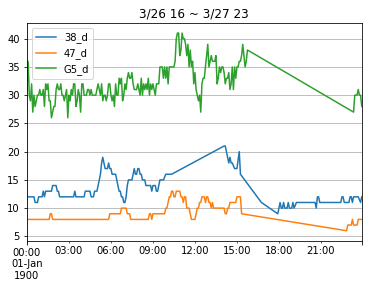

In [35]:
df = df.astype(float)
df = df.interpolate()
df.plot()
plt.title('3/26 16 ~ 3/27 23')
plt.grid(True)
plt.show()

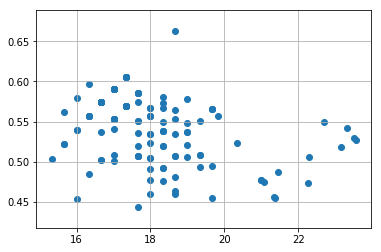

In [38]:
total_std = []
average = []
for x in range(0, 135):
    row = np.array(df.iloc[x])
    std = row.std()
    avg = row.mean()
    total_std.append(std)
    average.append(avg)
total_std = np.array(total_std)
average = np.array(average)
CV = total_std / average
df_CV = pd.DataFrame({"CV": CV}, index = average)
plt.scatter(average, CV)
plt.grid(True)
plt.show()